In [1]:
import numpy as np
import xarray as xr
import gcsfs
from matplotlib import pyplot as plt
from xgcm import Grid
from xhistogram.xarray import histogram
%matplotlib inline
from matplotlib import colors as cols
import scipy.special as sp
from intake import open_catalog

In [2]:
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/channel.yaml")
ds01  = cat["channel_ridge_resolutions_01km"].to_dask()
ds05  = cat["channel_ridge_resolutions_05km"].to_dask()
ds20  = cat["channel_ridge_resolutions_20km"].to_dask()

In [3]:
plt.rcParams.update({'font.size': 18})
# plt.rcParams.update({'font.size': 16})

In [4]:
grid20 = Grid(ds20, periodic='X')
grid05 = Grid(ds05, periodic='X')
grid01 = Grid(ds01, periodic='X')

In [5]:
horispace01 = 1e3
horispace05 = 5e3
horispace20 = 20e3
time_index = 0
depth = -50
f =  -0.83e-4
daytime = 86400
alpha = 2e-4
gravity = 9.81
# ybound = 2e5
ybound = 5e5

In [6]:

depth = 0
vort01_0 = grid01.interp(grid01.interp((grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'X') - grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend')),
                   'X'), 'Y', boundary='extend')/horispace01

strain01_0 = ((grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'X') - grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))**2 + 
          (grid01.interp(grid01.interp(grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'X') + grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend'),
                       'X'), 'Y', boundary='extend'))**2)**0.5/horispace01




depth = 0
vort05_0 = grid05.interp(grid05.interp((grid05.diff(ds05.V.sel(Z=depth,method='nearest'), 'X') - grid05.diff(ds05.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend')),
                   'X'), 'Y', boundary='extend')/horispace05

strain05_0 = ((grid05.diff(ds05.U.sel(Z=depth,method='nearest'), 'X') - grid05.diff(ds05.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))**2 + 
          (grid05.interp(grid05.interp(grid05.diff(ds05.V.sel(Z=depth,method='nearest'), 'X') + grid05.diff(ds05.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend'),
                       'X'), 'Y', boundary='extend'))**2)**0.5/horispace05



depth = 0
vort20_0 = grid20.interp(grid20.interp((grid20.diff(ds20.V.sel(Z=depth,method='nearest'), 'X') - grid20.diff(ds20.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend')),
                   'X'), 'Y', boundary='extend')/horispace20
strain20_0 = ((grid20.diff(ds20.U.sel(Z=depth,method='nearest'), 'X') - grid20.diff(ds20.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))**2 + 
          (grid20.interp(grid20.interp(grid20.diff(ds20.V.sel(Z=depth,method='nearest'), 'X') + grid20.diff(ds20.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend'),
                       'X'), 'Y', boundary='extend'))**2)**0.5/horispace20

In [7]:
vortband01 = np.linspace(-7, 7, 240)
strainband01 = np.linspace(.5e-3, 7, 240)

ybound = 5e5

binbox01 =  (vortband01[1]-vortband01[0])*(strainband01[1]-strainband01[0])

vort_01_0 = (vort01_0.sel(YC = slice(ybound,2e6-ybound))/f).rename('vort1_0')
strain_01_0 = (abs(strain01_0.sel(YC = slice(ybound,2e6-ybound))/f)).rename('strain1_0')


hist01 = histogram(vort_01_0,strain_01_0,dim = ['XC','YC'] , bins=[vortband01,strainband01])
hist01.load()


vort_05_0 = (vort05_0.sel(YC = slice(ybound,2e6-ybound))/f).rename('vort1_0')
strain_05_0 = (abs(strain05_0.sel(YC = slice(ybound,2e6-ybound))/f)).rename('strain1_0')

hist05 = histogram(vort_05_0,strain_05_0,dim = ['XC','YC'], bins=[vortband01,strainband01])
hist05.load()


vort_20_0 = (vort20_0.sel(YC = slice(ybound,2e6-ybound))/f).rename('vort1_0')
strain_20_0 = (abs(strain20_0.sel(YC = slice(ybound,2e6-ybound))/f)).rename('strain1_0')


hist20 = histogram(vort_20_0,strain_20_0,dim = ['XC','YC'] , bins=[vortband01,strainband01])
hist20.load()


<xarray.DataArray 'histogram_vort1_0_strain1_0' (time: 35, vort1_0_bin: 239, strain1_0_bin: 239)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * time           (time) timedelta64[ns] 79210 days 79220 days ... 79550 days
  * vort1_0_bin    (vort1_0_bin) float64 -6.971 -6.912 -6.854 ... 6.912 6.971
  * strain1_0_bin  (strain1_0_bin) float64 0.01514 0.04443 ... 6.956 6.985

In [9]:

hist01TMean = hist01.mean(dim='time')
mask_vortDom = xr.where(abs(hist01TMean.vort1_0_bin)>abs(hist01TMean.strain1_0_bin),1,0)
mask_ac = xr.where(hist01TMean.vort1_0_bin<0,1,0)
mask_c = xr.where(hist01TMean.vort1_0_bin>0,1,0)
mask_strDom = xr.where(abs(hist01TMean.vort1_0_bin)<abs(hist01TMean.strain1_0_bin),1,0)

hist05TMean = (5**2)/(binbox01*2000*1000)*hist05.mean(dim='time')
mask_in5km = xr.where(hist05TMean<1e-5, 0, 1)
mask_out5km = xr.where(hist05TMean<1e-5, 1, 0)

In [20]:
### wpcp
WpCpv = np.zeros([76])
WpCpm = np.zeros([76])
WpCpac = np.zeros([76])
WpCpc = np.zeros([76])

timeBeg = 4
timeEnd = 18

for depthInd in range(76):
    
    W01_100_all = grid01.interp(ds01.W, 'Z', boundary='extend').sel(YC = slice(ybound,2e6-ybound))
    Tracer01_100_all =  ds01.PTRACER01.sel(YC = slice(ybound,2e6-ybound))
    Wtracer01_prime_all = (W01_100_all - W01_100_all.mean(dim=['XC','YC']))*(Tracer01_100_all - Tracer01_100_all.mean(dim=['XC','YC']))
    aa_01_100_wpcp = Wtracer01_prime_all.isel(Z=depthInd).isel(time=slice(timeBeg,timeEnd)).rename('Wtracer1_100')
    aa_01_100_wpcp.load()

    hab01_100 = histogram(vort_01_0.isel(time = slice(timeBeg,timeEnd)), strain_01_0.isel(time = slice(timeBeg,timeEnd)), weights=aa_01_100_wpcp, dim = ['XC','YC'], bins=[vortband01,strainband01])
    hab01_100.load()
    WpCpv[depthInd] = (hab01_100.mean(dim='time')*mask_out5km*mask_strDom).sum().values[()]
    WpCpac[depthInd] = (hab01_100.mean(dim='time')*mask_vortDom*mask_ac).sum().values[()]
    WpCpc[depthInd] = (hab01_100.mean(dim='time')*mask_vortDom*mask_c).sum().values[()]
    WpCpm[depthInd] = (hab01_100.mean(dim='time')*mask_in5km*mask_strDom).sum().values[()]
#     print(depthInd)

In [24]:
### wc 
WCv_full = np.zeros([76])
WCm_full = np.zeros([76])
WCac_full = np.zeros([76])
WCc_full = np.zeros([76])
for depthInd in range(76):
    
    W01_100_all = grid01.interp(ds01.W, 'Z', boundary='extend').sel(YC = slice(ybound,2e6-ybound))
    Tracer01_100_all =  ds01.PTRACER01.sel(YC = slice(ybound,2e6-ybound))
    Wtracer01_prime_all = W01_100_all*Tracer01_100_all
    aa_01_100_wc = Wtracer01_prime_all.isel(Z=depthInd).isel(time=slice(timeBeg,timeEnd)).rename('Wtracer1_100')
    aa_01_100_wc.load()

    hab01_100 = histogram(vort_01_0.isel(time=slice(timeBeg,timeEnd)), strain_01_0.isel(time=slice(timeBeg,timeEnd)), weights=aa_01_100_wc, dim = ['XC','YC'], bins=[vortband01,strainband01])
    hab01_100.load()
    WCv_full[depthInd] = (hab01_100.mean(dim='time')*mask_out5km*mask_strDom).sum().values[()]
    WCac_full[depthInd] = (hab01_100.mean(dim='time')*mask_vortDom*mask_ac).sum().values[()]
    WCc_full[depthInd] = (hab01_100.mean(dim='time')*mask_vortDom*mask_c).sum().values[()]
    WCm_full[depthInd] = (hab01_100.mean(dim='time')*mask_in5km*mask_strDom).sum().values[()]
#     print(depthInd)

(-400.0, 0.0)

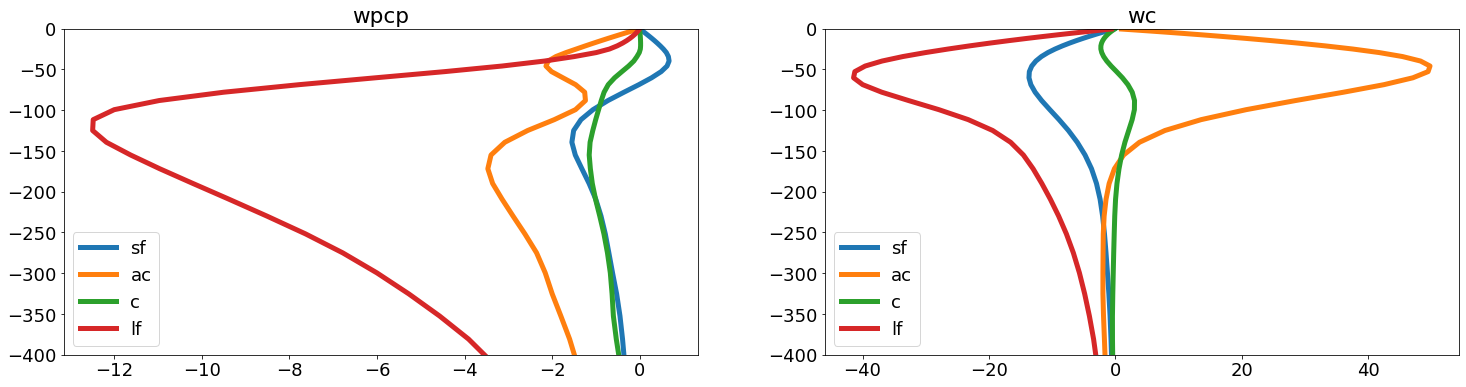

In [37]:
plt.figure(figsize=(25,6))



plt.subplot(121)
plt.plot(WpCpv, ds01.Z.values, linewidth = 5)
plt.plot(WpCpac, ds01.Z.values, linewidth = 5)
plt.plot(WpCpc, ds01.Z.values, linewidth = 5)
plt.plot(WpCpm, ds01.Z.values, linewidth = 5)


plt.legend(['sf','ac','c','lf'])
plt.title('wpcp')
# plt.xlim(-75, 75) 
plt.ylim(-400, 0) 


plt.subplot(122)
plt.plot(WCv_full, ds01.Z.values, linewidth = 5)
plt.plot(WCac_full, ds01.Z.values, linewidth = 5)
plt.plot(WCc_full, ds01.Z.values, linewidth = 5)
plt.plot(WCm_full, ds01.Z.values, linewidth = 5)


plt.legend(['sf','ac','c','lf'])
plt.title('wc')
# plt.xlim(-75, 75) 
plt.ylim(-400, 0) 

In [ ]:
    WpCpv[depthInd] = (hab01_100.mean(dim='time')*mask_out5km*mask_strDom).sum().values[()]
    WpCpac[depthInd] = (hab01_100.mean(dim='time')*mask_vortDom*mask_ac).sum().values[()]
    WpCpc[depthInd] = (hab01_100.mean(dim='time')*mask_vortDom*mask_c).sum().values[()]
    WpCpm[depthInd] = (hab01_100.mean(dim='time')*mask_in5km*mask_strDom).sum().values[()]

In [28]:
### wc 5km
WCm_full05 = np.zeros([76])
WCac_full05 = np.zeros([76])
WCc_full05 = np.zeros([76])
for depthInd in range(76):
    
    W05_150_all = grid05.interp(ds05.W, 'Z', boundary='extend').sel(YC = slice(ybound,2e6-ybound))
    Tracer05_150_all =  ds05.PTRACER01.sel(YC = slice(ybound,2e6-ybound))
    Wtracer05_prime_all = (W05_150_all)*(Tracer05_150_all)
    aa_05_150_wpcp = Wtracer05_prime_all.isel(Z=depthInd).isel(time=slice(timeBeg,timeEnd)).rename('Wtracer1_100')
    aa_05_150_wpcp.load()

    hab05_150 = histogram(vort_05_0.isel(time = slice(timeBeg,timeEnd)), strain_05_0.isel(time = slice(timeBeg,timeEnd)), weights=aa_05_150_wpcp, dim = ['XC','YC'], bins=[vortband01,strainband01])
    hab05_150.load()
    WCac_full05[depthInd] = (hab05_150.mean(dim='time')*mask_vortDom*mask_ac).sum().values[()]
    WCc_full05[depthInd] = (hab05_150.mean(dim='time')*mask_vortDom*mask_c).sum().values[()]
    WCm_full05[depthInd] = (hab05_150.mean(dim='time')*mask_strDom).sum().values[()]
#     print(depthInd)

In [29]:
### wpcp  5km
WpCpm05 = np.zeros([76])
WpCpac05 = np.zeros([76])
WpCpc05 = np.zeros([76])
for depthInd in range(76):
    
    W05_150_all = grid05.interp(ds05.W, 'Z', boundary='extend').sel(YC = slice(ybound,2e6-ybound))
    Tracer05_150_all =  ds05.PTRACER01.sel(YC = slice(ybound,2e6-ybound))
    Wtracer05_prime_all = (W05_150_all - W05_150_all.mean(dim=['XC','YC']))*(Tracer05_150_all - Tracer05_150_all.mean(dim=['XC','YC']))
    aa_05_150_wpcp = Wtracer05_prime_all.isel(Z=depthInd).isel(time=slice(timeBeg,timeEnd)).rename('Wtracer1_100')
    aa_05_150_wpcp.load()

    hab05_150 = histogram(vort_05_0.isel(time = slice(timeBeg,timeEnd)), strain_05_0.isel(time = slice(timeBeg,timeEnd)), weights=aa_05_150_wpcp, dim = ['XC','YC'], bins=[vortband01,strainband01])
    hab05_150.load()
    WpCpac05[depthInd] = (hab05_150.mean(dim='time')*mask_vortDom*mask_ac).sum().values[()]
    WpCpc05[depthInd] = (hab05_150.mean(dim='time')*mask_vortDom*mask_c).sum().values[()]
    WpCpm05[depthInd] = (hab05_150.mean(dim='time')*mask_strDom).sum().values[()]
#     print(depthInd)

(-400.0, 0.0)

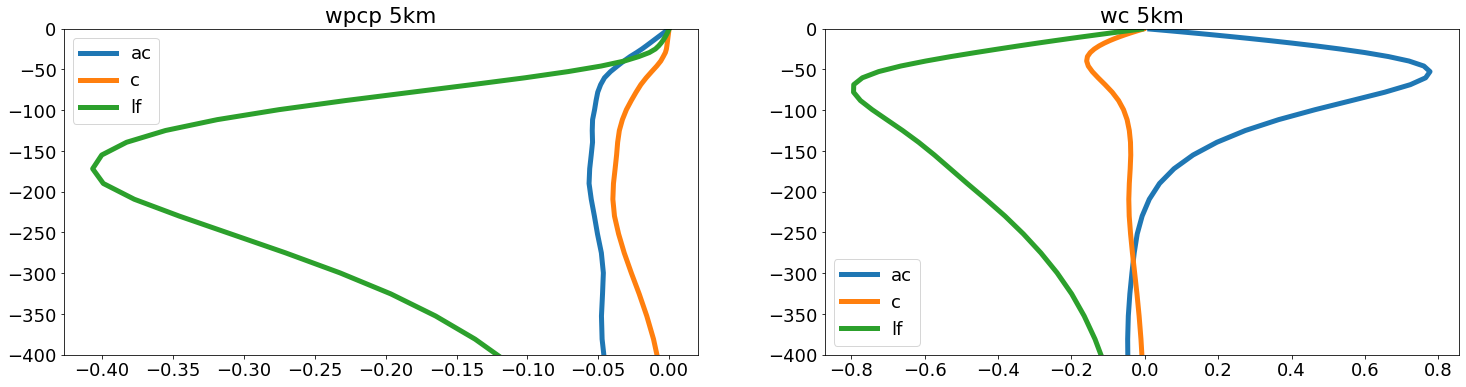

In [36]:
plt.figure(figsize=(25,6))



plt.subplot(121)
plt.plot(WpCpac05, ds01.Z.values, linewidth = 5)
plt.plot(WpCpc05, ds01.Z.values, linewidth = 5)
plt.plot(WpCpm05, ds01.Z.values, linewidth = 5)


plt.legend(['ac','c','lf'])
plt.title('wpcp 5km')
# plt.xlim(-75, 75) 
plt.ylim(-400, 0) 


plt.subplot(122)
plt.plot(WCac_full05, ds01.Z.values, linewidth = 5)
plt.plot(WCc_full05, ds01.Z.values, linewidth = 5)
plt.plot(WCm_full05, ds01.Z.values, linewidth = 5)


plt.legend(['ac','c','lf'])
plt.title('wc 5km')
# plt.xlim(-75, 75) 
plt.ylim(-400, 0) 